In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import json
import baseline
from baseline import *
from decoder import *
from alphabet import *
from train import *

from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
LANGUAGE = 'Python'

def filter_ascii(strings):
    'Returns only the strings that can be encoded in ASCII.'
    l = []
    for s in strings:
        try:
            s.encode('ascii')
            l.append(s)
        except UnicodeEncodeError:
            pass
        
    return l

with open('dataset/medium.json') as f:
    multilang_dataset = json.load(f)
    dataset = multilang_dataset[LANGUAGE]
    
    dataset['train'] = filter_ascii(dataset['train'])
    dataset['dev'] = filter_ascii(dataset['dev'])
    dataset['test'] = filter_ascii(dataset['test'])
    
    tiny_dataset = {
        'train': dataset['train'][:50],
        'dev': dataset['train'][:50],
        'test': dataset['train'][:50],
    }
    
    print('{} training examples, {} validation examples, {} test exampless'.format(
        len(dataset['train']), 
        len(dataset['dev']),
        len(dataset['test'])))

79648 training examples, 9943 validation examples, 9963 test exampless


In [22]:
def generate_dumb_dataset():
    'Returns a dataset where all examples are the same string, which consists of 10 times the same letter.'

    SIZE = 200
    l = []

    for i in range(SIZE):
        l.append(random.choice('abcdefghijklmnopqrstuvwxyz') * random.choice([5, 10]))
        
    return {'train': l, 'dev': l, 'test': l}

dumb_dataset = generate_dumb_dataset()

In [242]:
alphabet = AsciiOneHotEncoding()

encoder = baseline.UniformEncoder(0.5)
decoder = AutoCompleteDecoderModel(alphabet)
device = torch.device(0) if torch.cuda.is_available() else torch.device('cpu')

Epoch 0 iteration 0: loss = 4.863
Epoch 14 iteration 2: loss = 0.349
Epoch 28 iteration 4: loss = 0.288
Epoch 42 iteration 6: loss = 0.198


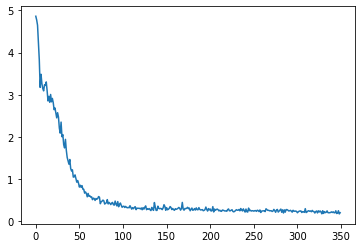

In [243]:
parameters = {
    'learning_rate': 1e-2,
    'verbose': True,
    'batch_size': 32,
    'init_scale': 0.1,
    'epochs': 50,
}

train_loss_history = train(encoder, decoder, dumb_dataset, parameters, device)
plt.plot(train_loss_history)

# End-to-end samples

In [284]:
SPLIT = 'train'

s = random.choice(dumb_dataset[SPLIT])
compressed = encoder.encode(s)
decompressed = decoder([compressed])

print('String:', repr(s))
print('Encoded:', repr(compressed))
print('Decoded:', repr(decompressed[0]))

String: 'fffff'
Encoded: 'fff'
Decoded: 'ffffff'
